 ## ZOMATO EDA 

In [215]:
# Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [13]:
# Importing ZOMATO DATASET
zom = pd.read_csv("zomato.csv",encoding='latin-1')
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte : 
# Whenver we encounter this error we need to use encoding parameter

# Display first n rows of dataset
zom.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [14]:
## Display the columns of the dataset
zom.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [15]:
# Display the details about columns (Not null count, Dtype)
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [24]:
# Get the basic statistics of the int data in the entire dataset
zom.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### DATA ANALYSIS OPERATION INCLUDES:
1. Missing Values
2. Explore the Numerical Variables
3. Explore about Categorical Variables
4. Finding Relationship between features

In [28]:
# Finding the features having null values
zom.isnull().sum()
#Cuisines have 9 missing values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [34]:
# Features having Null values using list comprehensions
[features for features in zom.columns if zom[features].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

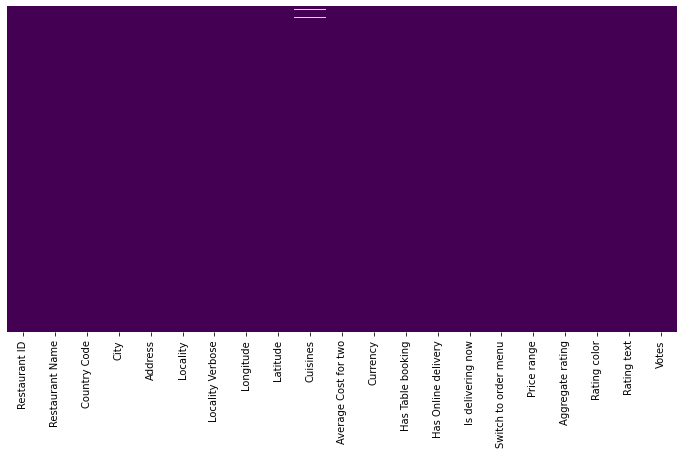

In [112]:
# Features having Null values using heat map
plt.rcParams['figure.figsize'] = (12,6)
sns.heatmap(zom.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# Since values are very less thats why we are not able to see the missing values

In [38]:
#Importing the country data
df_country = pd.read_excel("Country-Code.xlsx")
#Displaying first 2 rows
df_country.head(2)

,Country Code,Country
0,1,India
1,14,Australia


In [39]:
# Displaying the columns of the country dataset
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [47]:
# Combining two Data Frame "Zom" & "df_country"
df_zom = pd.merge(zom,df_country,on="Country Code",how='left')

In [48]:
# Check the datatypes of the entire dataset
df_zom.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [69]:
# Max Number of transactions happening for Zomato is in India
df_zom.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [73]:
# Storing all the count values in a variables
country_values = df_zom.Country.value_counts().values

In [72]:
# Storing all the country names in a variable 
# Alternative 1:
country_names = df_zom.Country.value_counts().index
# Alternative 2:
#country_names = df_zom.Country.unique()
print(country_names)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')


([<matplotlib.patches.Wedge at 0x1fc1c8fce80>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.4%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.7%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.9%')])

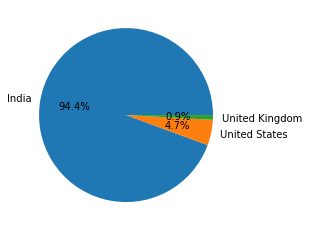

In [93]:
## PIE CHART 
## Top 3 countries that used Zomato based on transactions
plt.pie(country_values[:3],labels = country_names[:3],autopct = "%1.1f%%")
## Observation: Zomato maximum records or transactions are from India then USA & United Kingdom respectively

In [104]:
#Exploring rating feature
"""
1. Group by rating feature 
2. Get the size
3. Reset the index to get the proper data frame format
4. renamed column "0" to Rating_count
"""
ratings = df_zom.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating count"})

In [108]:
#### Displaying the rows of Ratings DataFrame
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


### Observations
1. 4.5 - 4.9 --> Excellant
2. 4.0 - 4.4 --> Very Good
3. 3.5 - 3.9 --> Good
4. 2.5 - 3.4 --> Average
5. 1.8 - 2.4 --> Poor
6. 0.0 --> Not Rated 

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

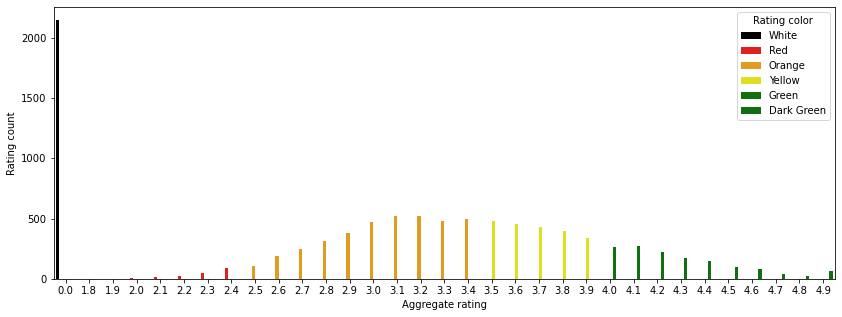

In [127]:
# Relationship between the Aggregate Rating & Rating count
plt.rcParams['figure.figsize'] = (14,5)
sns.barplot(x="Aggregate rating",y="Rating count",data=ratings,hue = 'Rating color',palette=['Black','red','orange','yellow','green','green'])

### Observation
1. Not Rated has the highest count
2. Maximum number of rating are between 2.5 to 3.4

C:\Users\HIMANK KHANDELWAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating color', ylabel='count'>

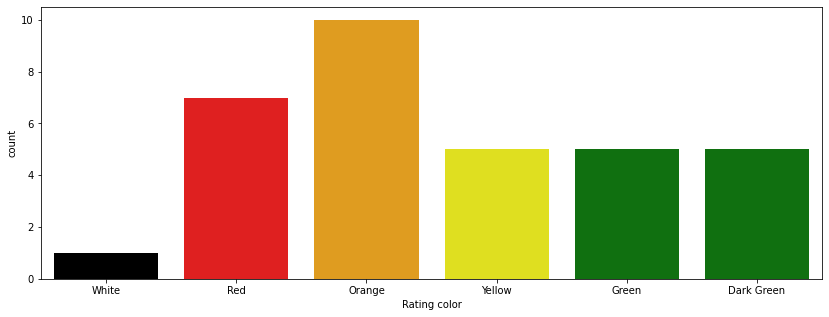

In [129]:
#Count Plot
sns.countplot('Rating color',data=ratings,palette=['Black','red','orange','yellow','green','green'])

In [154]:
# Find that countries name that has given 0 rating
df_zom[df_zom['Aggregate rating']==0.0].groupby("Country").size().reset_index().rename(columns={0:"Not_Rated Count"}).sort_values("Not_Rated Count",ascending=False)

# Observation:
"""India has the highest transactions who rated zero or maybe didn't rate anything"""

,Country,Not_Rated Count
1,India,2139
0,Brazil,5
3,United States,3
2,United Kingdom,1


In [165]:
## Which currency is used by which country?
df_zom.groupby(['Country','Currency']).size().reset_index().drop(columns=0).sort_values('Currency')

,Country,Currency
6,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
0,Australia,Dollar($)
2,Canada,Dollar($)
8,Singapore,Dollar($)
14,United States,Dollar($)
12,UAE,Emirati Diram(AED)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)


In [180]:
# Which countries has online delivery options :: In India & UAE online delivery is available in almost all areas
df_zom.loc[df_zom['Has Online delivery']=='Yes',"Country"].unique()

array(['UAE', 'India'], dtype=object)

In [181]:
# Which countries has not online delivery options
df_zom.loc[df_zom['Has Online delivery']=='No',"Country"].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Ahmedabad',
       'Guwahati', 'Lucknow', 'Bhubaneshwar', 'Amritsar', 'Pune', 'Puducherry',
       'Patna', 'Ludhiana', 'Ranchi', 'Surat', 'Vadodara', 'Nashik', 'Nagpur',
       'Mysore', 'Mumbai', 'Varanasi', 'Mangalore', 'Agra', 'Kochi', 'Kolkata',
       'Dehradun', 'Allahabad', 'Aurangabad', 'Bangalore', 'Bhopal', 'Chennai',
       'Coimbatore', 'Goa', 'Indore', 'Jaipur', 'Kanpur', 'Vizag',
       'Chandigarh', 'Hyderabad', 'Secunderabad', 'Panchkula', 'Mohali'],
      dtype='object')
[5473 1118 1080  251   25   21   21   21   21   21   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   20   20   20   20
   20   20   20   20   20   20   20   20   20   20   18   18    2    1
    1]


([<matplotlib.patches.Wedge at 0x1fc289426d0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.9%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.1%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.6%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.2%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.3%')])

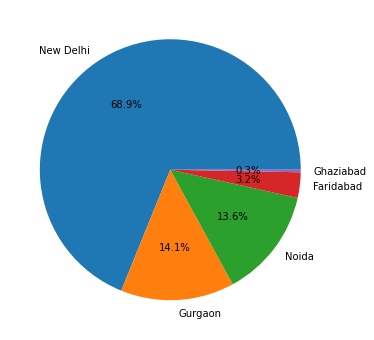

In [208]:
# Top 5 cities in India which orders most

# Filter the India Data
India_zom = df_zom.loc[df_zom['Country']== 'India']

# Get the city names
India_City = India_zom['City'].value_counts().index
print(India_City)

# Get the respective city transactions
India_City_Values = India_zom['City'].value_counts().values
print(India_City_Values)

#Pie chart
plt.rcParams['figure.figsize'] = (12,6)
plt.pie(India_City_Values[:5],labels=India_City[:5],autopct = "%1.1f%%")

Index(['Abu Dhabi', 'Dubai', 'Sharjah'], dtype='object')
[20 20 20]


([<matplotlib.patches.Wedge at 0x1fc272f5e50>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Abu Dhabi'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Dubai'),
  Text(0.5500001486524352, -0.9526278583383436, 'Sharjah')])

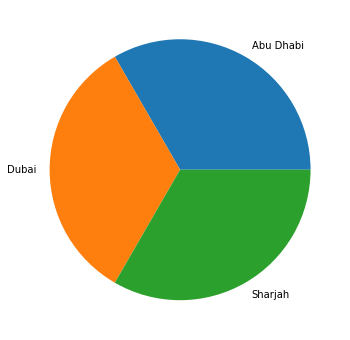

In [202]:
# Top cities in UAE which orders most

# Filter the UAE Data
UAE_zom = df_zom.loc[df_zom['Country']== 'UAE']

# Get the city names
UAE_City = UAE_zom['City'].value_counts().index
print(UAE_City)

# Get the respective city transactions
UAE_City_Values = UAE_zom['City'].value_counts().values
print(UAE_City_Values)

#Pie chart
plt.rcParams['figure.figsize'] = (12,6)
plt.pie(UAE_City_Values[:5],labels=UAE_City[:5])

Index(['Albany', 'Gainesville', 'Pensacola', 'Orlando', 'Rest of Hawaii',
       'Savannah', 'Sioux City', 'Athens', 'Macon', 'Tampa Bay', 'Valdosta',
       'Pocatello', 'Dubuque', 'Des Moines', 'Davenport', 'Dalton', 'Columbus',
       'Waterloo', 'Cedar Rapids/Iowa City', 'Boise', 'Augusta', 'Princeton',
       'Weirton', 'Vernonia', 'Mc Millan', 'Potrero', 'Ojo Caliente', 'Monroe',
       'Miller', 'Lincoln', 'Lakeview', 'Fernley', 'Cochrane', 'Clatskanie',
       'Winchester Bay'],
      dtype='object')
[20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20  1  1  1
  1  1  1  1  1  1  1  1  1  1  1]


([<matplotlib.patches.Wedge at 0x1fc10bdc790>,
 [Text(0.8899186877588753, 0.6465637858537406, 'Albany'),
  Text(-0.3399187231970732, 1.046162158377023, 'Gainesville'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'Pensacola'),
  Text(-0.33991862524830174, -1.0461621902025062, 'Orlando'),
  Text(0.8899187482945414, -0.6465637025335375, 'Rest of Hawaii')])

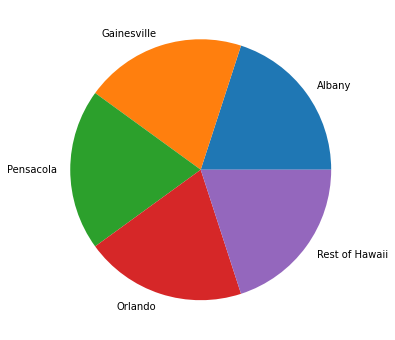

In [206]:
# Top 5 cities in USA which orders most

# Filter the UAE Data
USA_zom = df_zom.loc[df_zom['Country']== 'United States']

# Get the city names
USA_City = USA_zom['City'].value_counts().index
print(USA_City)

# Get the respective city transactions
USA_City_Values = USA_zom['City'].value_counts().values
print(USA_City_Values)

#Pie chart
plt.rcParams['figure.figsize'] = (12,6)
plt.pie(USA_City_Values[:5],labels=USA_City[:5])

In [214]:
# Find top 10 Cuisines
df_zom.Cuisines.value_counts().head(10).reset_index().rename(columns={"index":"Cuisines","Cuisines":"Number of Occurrence"})

,Cuisines,Number of Occurrence
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149
